['Abundances', 'Routes', 'Species', 'TimeSteps']


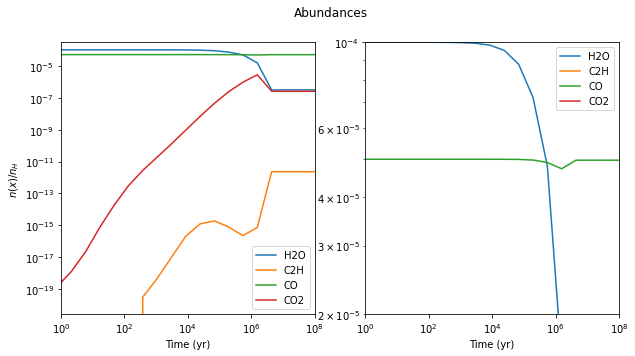

In [110]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = "learning/astrochem_output.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    keys = list(f.keys())
    print(keys)

    # Get the data
    abun = np.asarray(f[keys[0]])[0]
    rout = np.asarray(f[keys[1]])
    spec = np.asarray(f[keys[2]])
    time = np.asarray(f[keys[3]])
    
    
    fig,axs = plt.subplots(1,2,figsize=(10,5))
    fig.suptitle("Abundances")
    X = time
    for i in range(len(abun[0])):
        Y = [abun[j][i] for j in range(len(abun))]
        label = spec[i].decode('utf-8')
        for ax in axs:
            ax.loglog(X,Y,label=label)
    
    for ax in axs:
        ax.legend()
    axs[0].set(
        xlim=(1e0,1e8),
        ylim=(None,3e-4),
        xlabel="Time (yr)",
        ylabel="$n(x)/n_H$")
    axs[1].set(
        xlim=(1e0,1e8),
        ylim=(2e-5,1e-4),
        xlabel="Time (yr)")
    plt.show()

In [111]:
with h5py.File(filename, "r") as f:
    keys = list(f.keys())
    time = np.asarray(f[keys[3]])
    
    rout = f[keys[1]]
    rout_keys = rout.keys()
    print(rout_keys)
    rt_c2h = rout[rout_keys[0]]
    rt_co = rout[rout_keys[1]]
    print(np.asarray(rt_c2h)[0][0])
    print("--------------------")
    print(np.asarray(rt_co)[0][0])
#     print(rt_c2h.shape)
#     print(rt_co.shape)

<KeysViewHDF5 ['route_C2H', 'route_CO', 'route_CO2', 'route_H2O']>


TypeError: 'KeysViewHDF5' object is not subscriptable

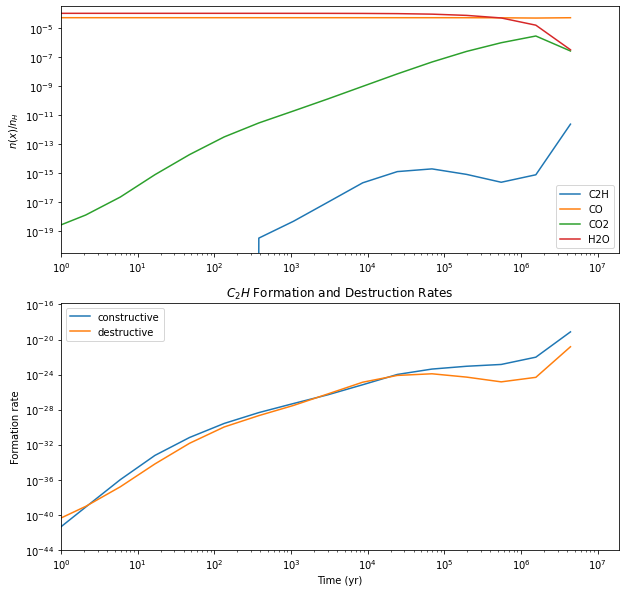

In [104]:
with h5py.File(filename, "r") as f:
    keys = list(f.keys())
    
    time = np.asarray(f[keys[3]])
    spec = np.asarray(f[keys[2]])
    abun = np.asarray(f[keys[0]])[0]
    
    rout_group = f[keys[1]]
    r_keys = list(rout_group.keys())
    routs = rout_group[r_keys[0]]
    routs = np.asarray(routs)[0]
    
    fig,axs = plt.subplots(2,1,figsize=(10,10))
    X = time[:-3]
    c2h = np.asarray([routs[i][0] for i in range(len(X))])
    
    for i in range(len(abun[0])):
        Y = [abun[j][i] for j in range(len(X))]
        label = spec[i].decode('utf-8')
        axs[0].loglog(X,Y,label=label)
    
    const_dest = [c2h[t][0] for t in range(len(X))]
    const = [const_dest[t][0] for t in range(len(X))]
    dest = [const_dest[t][1] for t in range(len(X))]
    Y1 = [const[t][1] for t in range(len(X))]
    Y2 = [dest[t][1] for t in range(len(X))]
    
    axs[1].loglog(X,Y1,label="constructive")
    axs[1].loglog(X,Y2,label="destructive")
            
    for ax in axs:
        ax.set(
            xlim=(1e0,None))
        ax.legend()
    axs[0].set(
        ylabel="$n(x)/n_H$",
            ylim=(None,3e-4))
    axs[1].set(
        title="$C_2H$ Formation and Destruction Rates",
        xlabel="Time (yr)",
        ylabel="Formation rate",
        ylim=(1e-44,None))
    
    
    plt.show()